   ## <center><h1>Fraud model detection with SAS and Python</center></h1>

![How to choosse the right Algorithm by SAS](pictures/Fraud.PNG "Fraud machine Learning")

## <center><h1>Data integration with python</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

### Loading data from SQL LITE Data Base

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
with sqlite3.connect('/root/streamanalyse/transactions.db') as con:
    transaction = pd.read_sql_query("SELECT * from order_claim_ticket_v2", con)
    
transaction.columns

Index(['order_id', 'gender', 'title', 'given_name', 'middle_initial',
       'surname', 'street_address', 'city', 'state', 'zipcode', 'country',
       'country_full', 'email_address', 'username', 'password',
       'telephone_number', 'mothers_maiden', 'birthday', 'CC_type',
       'CC_number', 'cvv2', 'cc_expiration', 'national_id', 'color',
       'occupation', 'ref_domain', 'guid', 'latitude', 'longitude',
       'total_session_length', 'pageview_pre_purchase_visits', 'time_on_cart',
       'product_view_count', 'total_visit_clicks', 'fraud',
       'customer_credit_selection', 'payment_type', 'plan_type',
       'existing_ecom_customer', 'customer_id'],
      dtype='object')

### Exploratory Data Analysis with python

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = transaction.select_dtypes(include=numerics)
newdf.describe()

,order_id,latitude,longitude,total_session_length,pageview_pre_purchase_visits,time_on_cart,product_view_count,total_visit_clicks,fraud,existing_ecom_customer,customer_id
count,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000,25000.000
mean,12500.500,38.006,-91.417,25.008,69.996,10.008,5.011,30.030,0.002,0.299,57698397.500
std,7217.023,5.245,16.538,0.915,0.761,0.987,1.085,1.213,0.040,0.458,7217.023
min,1.000,9.027,-170.574,8.483,52.000,-8.669,1.000,12.000,0.000,0.000,57685898.000
25%,6250.750,34.036,-97.573,24.593,70.000,9.597,4.000,29.000,0.000,0.000,57692147.750
50%,12500.500,39.031,-87.425,25.055,70.000,10.149,5.000,30.000,0.000,0.000,57698397.500
75%,18750.250,41.650,-79.944,25.473,70.000,10.624,6.000,30.000,0.000,1.000,57704647.250
max,25000.000,70.475,145.790,32.207,77.000,14.400,16.000,44.000,1.000,1.000,57710897.000


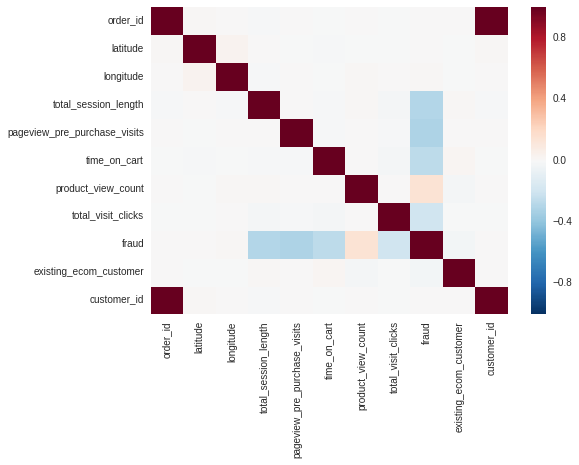

In [4]:
corr = newdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
!pwd
transaction.to_csv("/usr/local/share/jupyter/data/export.csv", sep=';', encoding='utf-8')

/usr/local/share/jupyter


## <center><h1>Loading SAS magic for python</center></h1>

In [1]:
%load_ext saspy.sas_magic

Using SAS Config named: iomlinux
Please enter the IOM user id: sasdemo
Please enter the password for IOM user sasdemo: ········
SAS Connection established. Subprocess id is 26236



In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%IML  %%OPTMODEL  %%SAS  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%py

In [4]:
%%SAS
proc import datafile="/usr/local/share/jupyter/data/export.csv"
out=fraude dbms=dlm replace;
delimiter=";";
getnames=yes;
run;

proc import datafile="/usr/local/share/jupyter/data/export.csv"
out=validate dbms=dlm replace;
delimiter=";";
getnames=yes;
run;

## Exploratory Data Analysis with SAS

In [5]:
%%SAS
proc contents data=fraude;run;

In [36]:
%%SAS
proc freq data=fraude;
table fraud;
run;

fraud,FrÃ©quence,Pourcentage,FrÃ©quencecumulÃ©e,PourcentagecumulÃ©
0,24960,99.84,24960,99.84
1,40,0.16,25000,100.00


In [37]:
%%SAS
proc freq data=fraude ; 
table fraud*(gender customer_credit_selection payment_type plan_type)/ missing nocum chisq ;
run;

In [38]:
%%SAS
proc means data=fraude mean max min median; 
class fraud;
var product_view_count time_on_cart total_session_length total_visit_clicks;
run;

fraud,N obs,Variable,Moyenne,Maximum,Minimum,MÃ©diane
0,24960,product_view_count time_on_cart total_session_length total_visit_clicks,5.0044872 10.0181185 25.0185089 30.0400641,13.0000000 14.4003816 32.2071079 44.0000000,1.0000000 -2.6611945 15.2825299 19.0000000,5.0000000 10.1496445 25.0565263 30.0000000
1,40,product_view_count time_on_cart total_session_length total_visit_clicks,8.8750000 3.6234333 18.2389354 23.9000000,16.0000000 9.7601354 25.1337887 31.0000000,3.0000000 -8.6687936 8.4832038 12.0000000,8.5000000 4.9276646 19.0352487 25.0000000



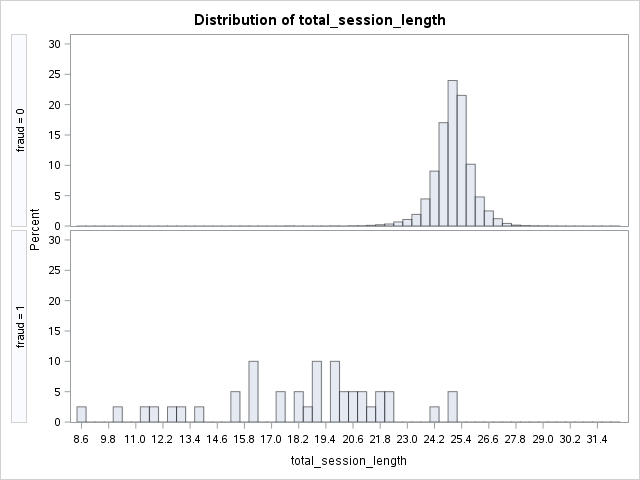
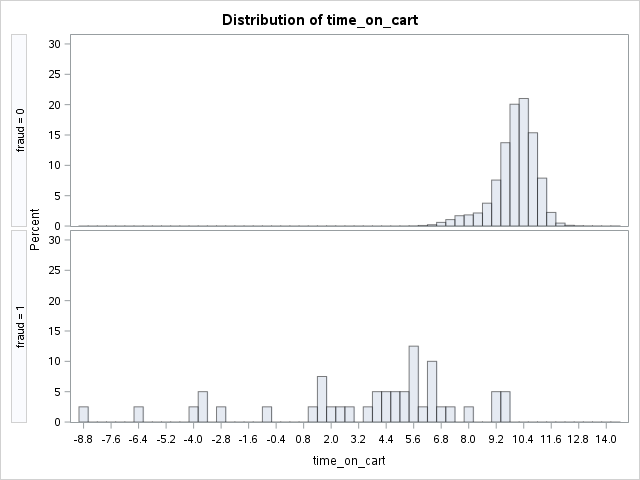
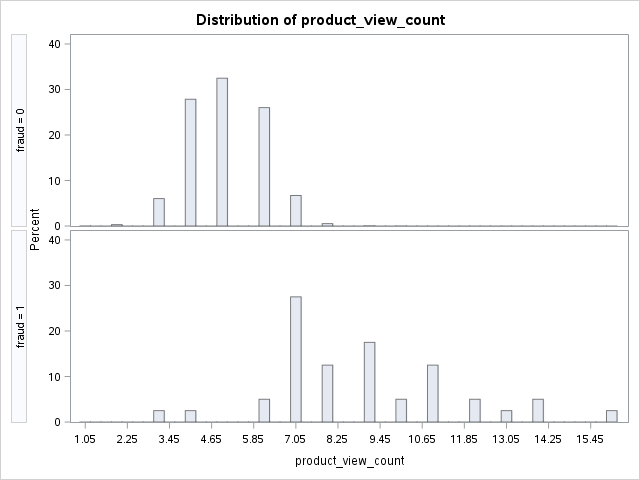
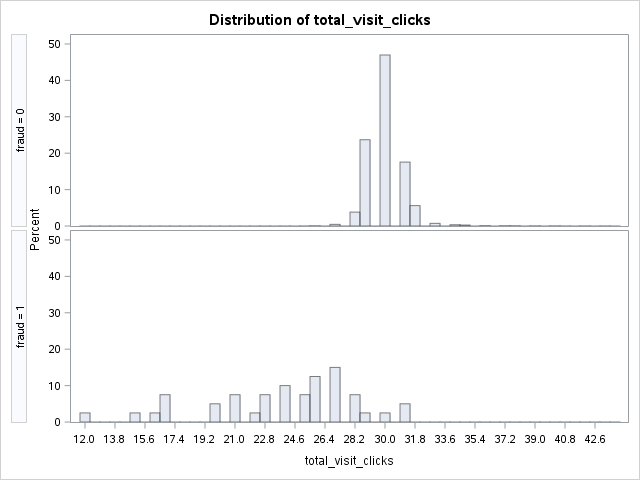

In [39]:
%%SAS
title 'Analysis of Plating Thickness';
proc univariate data=fraude noprint;
class fraud;
   histogram product_view_count time_on_cart total_session_length total_visit_clicks;
run;

In [41]:
%%SAS
title 'Fish Measurement Data';
proc corr data=fraude nomiss plots=matrix(histogram) ;
   var product_view_count time_on_cart total_session_length total_visit_clicks;
run;

## <center><h1>How can i choose the right Algorithm</center></h1>

![How to choosse the right Algorithm by SAS](pictures/CheatSheet.png "Fraud machine Learning")


## <h1><center>Random Forest Algorithm</center></h1>


![How to choosse the right Algorithm by SAS](pictures/decisiontree.png "decisiontree")

In [6]:
%%SAS
%macro rf(num, num2);
proc hpforest data=fraude
maxtrees= 500 vars_to_try=&num
seed=600 trainfraction=0.6
maxdepth=50 leafsize=6 alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstats&num2;
run;
%mend rf;

In [7]:
%%SAS
%rf(2,1);

In [8]:
%%SAS
%rf(3,2);

In [9]:
%%SAS
%rf(4,3);

## Investigating Average Square Error with Different Number of Variables to Try

In [46]:
%%SAS
proc sql;
create table ASE_groups as
select x.ntrees ,
x.predoob as ASE2vars_to_try,
y.predoob as ASE3vars_to_try,
z.predoob as ASE4vars_to_try
from fitstats1 x, fitstats2 y, fitstats3 z
where x.ntrees = y.ntrees
and x.ntrees = z.ntrees
and y.ntrees = z.ntrees;
run;

proc transpose data= ASE_groups out=ASE_groups1;
var ASE2vars_to_try ASE3vars_to_try ASE4vars_to_try;
run;
data ASE_groups2;
set ASE_groups1;
array RF(1:500) col1- col500;
do NTREES = 1 to 500;
ASE = RF(NTREES);
output;
end;
drop col1-col500 _LABEL_;
run;


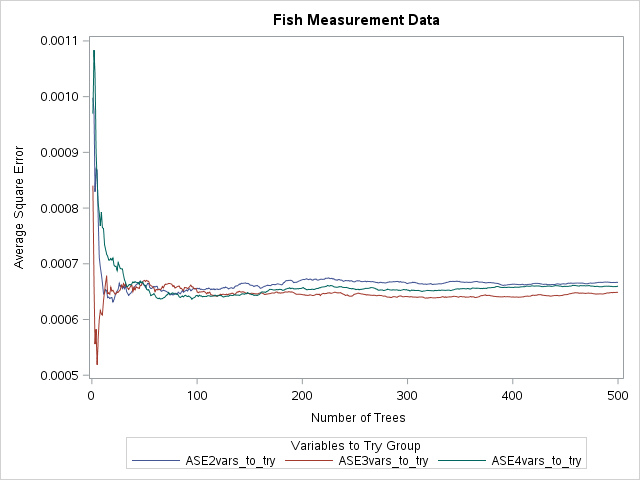

In [47]:
%%SAS
proc sgplot data=ASE_groups2;
series x=NTREES y=ASE/ group = _name_ ;
title 'Average Square Error with Different Number of Variables to Try';
LABEL ASE = "Average Square Error"
NTREES = "Number of Trees"
_name_ = "Variables to Try Group";
run;

Notice in Figure 1 how the lowest Average Square Error is associated with the ASE4vars_to_try group in
this case. Also, this figure is useful as it illustrates how the Average Square Error progresses over the
number of trees utilized. For the ASE4vars_to_try group, the Average Square error flattens out at around
250 trees. A general tip is that when the error flattens, the number of trees to utilize is just after this
flattening occurs. (Breiman, 2001) This is especially useful when very large numbers of trees are being
investigated and computational time is of importance.

In [48]:
%%SAS
%macro rf2(num, num2);
proc hpforest data=fraude
maxtrees= 500 vars_to_try=4
seed=600 trainfraction=0.6
maxdepth=50 leafsize=&num. alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstats&num2.;
run;
%mend rf2;

In [49]:
%%SAS
%rf2(4,1);

In [50]:
%%SAS
%rf2(8,2);

In [51]:
%%SAS
%rf2(16,3);

## Plotting Average Square Error with Different Leaf Size Specifications

In [52]:
%%SAS
proc sql;
create table ASE_Leaf as
select x.ntrees ,
x.predoob as ASELeaf4,
y.predoob as ASELeaf8,
z.predoob as ASELeaf16
from fitstats1 x, fitstats2 y, fitstats3 z
where x.ntrees = y.ntrees
and x.ntrees = z.ntrees
and y.ntrees = z.ntrees;
run;
proc transpose data= ASE_Leaf out=ASE_Leaf1;
var ASELeaf4 ASELeaf8 ASELeaf16;
run;
data ASE_Leaf2;
set ASE_Leaf1;
array RF(1:500) col1- col500;
do NTREES = 1 to 500;
ASE = RF(NTREES);
output;
end;
drop col1-col500 _LABEL_;
run;


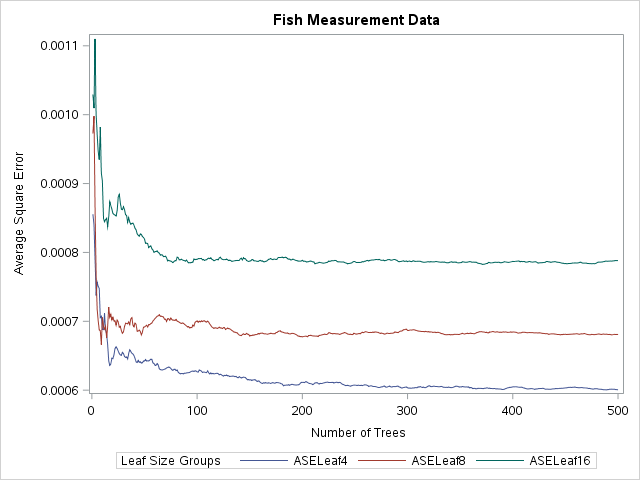

In [53]:
%%SAS
proc sgplot data=ASE_Leaf2;
series x=NTREES y=ASE/ group = _name_;
title 'Average Square Error with Different Leaf Size Groups';
LABEL ASE = "Average Square Error"
NTREES = "Number of Trees"
_name_ = "Leaf Size Groups";
run;

The number of observations required in each leaf also effects the average square error of random forest
models. As can be seen in Figure 2, the smallest leaf size of four results in the lowest average square
error.

## Modelisation on the train dataset

In [5]:
%%SAS
proc hpforest data=fraude
maxtrees= 500 vars_to_try=4
seed=600 trainfraction=0.6
maxdepth=50 leafsize=4 alpha= 0.1;
target fraud
/level=nominal;
input product_view_count time_on_cart total_session_length total_visit_clicks
/level=interval;
input gender customer_credit_selection payment_type plan_type
/level=nominal;
ods output fitstatistics = fitstatstest;
save file = "/tmp/modele.bin";
run;

## Apply the model on validate dataset and display confusion matrix

In [6]:
%%SAS
proc hp4score data=validate;
id order_id;
score file= "/tmp/modele.bin"
out=scored;
run;

In [7]:
%%SAS
proc sort data=fraude;by order_id;run;
proc sort data=scored;by order_id;run;

data matrix;
merge scored (in=info)
      fraude (in=base);
by order_id;
if base and info;
run;

In [16]:
%%SAS
proc freq data=scored ;
table fraud*I_fraud/norow nocol nocum;run;